<a href="https://colab.research.google.com/github/maskot1977/Python2020/blob/1202/80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!date

Thu Dec  3 06:36:21 UTC 2020


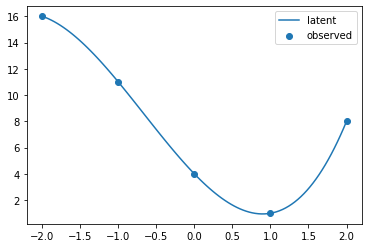

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

f = lambda x: x**3 + 2 * x**2 - 6 * x + 4
x_observed = np.linspace(-2, 2, 5) # 観測点
fx_observed = f(x_observed) # f(x) の観測値
x_latent = np.linspace(-2, 2, 101)
plt.scatter(x_observed, fx_observed, label='observed')
plt.plot(x_latent, f(x_latent), label='latent')
plt.legend()
plt.show()

In [3]:
xpo = np.ones(x_observed.size)
xpo

array([1., 1., 1., 1., 1.])

In [4]:
Xpo = [xpo]
Xpo

[array([1., 1., 1., 1., 1.])]

In [5]:
d = 3
for i in range(d):
    xpo = x_observed * xpo
    Xpo.append(xpo)

Xpo = np.matrix(Xpo)
Xpo

matrix([[ 1.,  1.,  1.,  1.,  1.],
        [-2., -1.,  0.,  1.,  2.],
        [ 4.,  1.,  0.,  1.,  4.],
        [-8., -1.,  0.,  1.,  8.]])

In [6]:
S = Xpo * Xpo.T
S

matrix([[  5.,   0.,  10.,   0.],
        [  0.,  10.,   0.,  34.],
        [ 10.,   0.,  34.,   0.],
        [  0.,  34.,   0., 130.]])

In [7]:
T = Xpo @ f(x_observed).reshape(len(x_observed), 1)
T

matrix([[ 40.],
        [-26.],
        [108.],
        [-74.]])

In [8]:
np.linalg.solve(S, T)

matrix([[ 4.],
        [-6.],
        [ 2.],
        [ 1.]])

In [9]:
np.linalg.solve(S, T).reshape(1, d + 1).A1

array([ 4., -6.,  2.,  1.])

In [10]:
import numpy as np
def get_coeff(x_observed, y_observed, d=3):
    xpo = np.ones(x_observed.size)
    Xpo = [xpo]

    for i in range(d):
        xpo = x_observed * xpo
        Xpo.append(xpo)

    Xpo = np.matrix(Xpo)
    S = Xpo * Xpo.T
    T = Xpo @ y_observed.reshape(len(x_observed), 1)
    return np.linalg.solve(S, T).reshape(1, d + 1).A1

In [11]:
def fit_polynomial(coeff, x_latent):
    y=0
    for i in range(len(coeff)):
        y += coeff[i] * pow(x_latent, i)
    return y

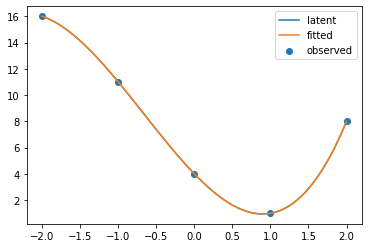

In [12]:
coeff = get_coeff(x_observed, fx_observed, d=3)
y_pred = fit_polynomial(coeff, x_latent)

plt.scatter(x_observed, fx_observed, label='observed')
plt.plot(x_latent, f(x_latent), label='latent')
plt.plot(x_latent, y_pred, label='fitted')
plt.legend()
plt.show()

In [13]:
import numpy as np
f = lambda x: 1/(1 + np.exp(-x))
g = lambda x: 1.0/(1.0+x**2)
h = lambda x: np.sin(x)

x_observed = np.linspace(-10, 10, 11) # 観測点

fx_observed = f(x_observed) # f(x) の観測値
gx_observed = g(x_observed) # g(x) の観測値
hx_observed = h(x_observed) # h(x) の観測値

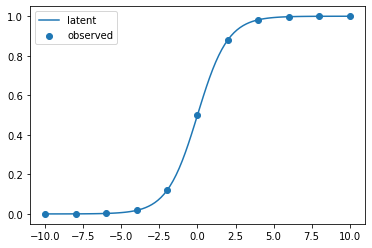

In [14]:
x_latent = np.linspace(-10, 10, 101)
plt.scatter(x_observed, fx_observed, label='observed')
plt.plot(x_latent, f(x_latent), label='latent')
plt.legend()
plt.show()

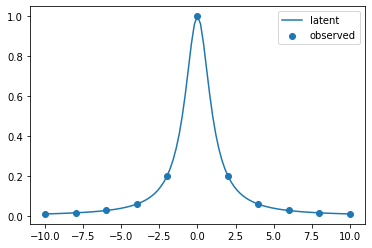

In [15]:
x_latent = np.linspace(-10, 10, 101)
plt.scatter(x_observed, gx_observed, label='observed')
plt.plot(x_latent, g(x_latent), label='latent')
plt.legend()
plt.show()

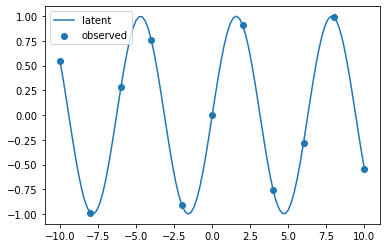

In [16]:
x_latent = np.linspace(-10, 10, 101)
plt.scatter(x_observed, hx_observed, label='observed')
plt.plot(x_latent, h(x_latent), label='latent')
plt.legend()
plt.show()

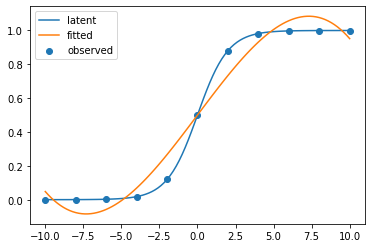

[ 5.00000000e-01  1.19807394e-01 -2.58793246e-18 -7.46038675e-04]


In [17]:
coeff = get_coeff(x_observed, fx_observed, d=3)
y_pred = fit_polynomial(coeff, x_latent)

plt.scatter(x_observed, fx_observed, label='observed')
plt.plot(x_latent, f(x_latent), label='latent')
plt.plot(x_latent, y_pred, label='fitted')
plt.legend()
plt.show()
print(coeff)

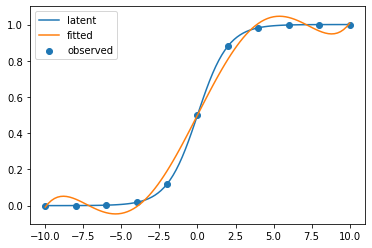

[ 5.00000000e-01  1.64283816e-01 -0.00000000e+00 -2.59274327e-03
  0.00000000e+00  1.45792468e-05]


In [18]:
coeff = get_coeff(x_observed, fx_observed, d=5)
y_pred = fit_polynomial(coeff, x_latent)

plt.scatter(x_observed, fx_observed, label='observed')
plt.plot(x_latent, f(x_latent), label='latent')
plt.plot(x_latent, y_pred, label='fitted')
plt.legend()
plt.show()
print(coeff)

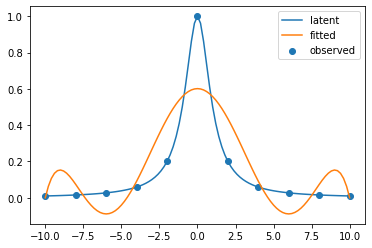

[ 6.01252513e-01  0.00000000e+00 -4.50391694e-02 -0.00000000e+00
  9.03139976e-04  0.00000000e+00 -5.12880817e-06]


In [19]:
coeff = get_coeff(x_observed, gx_observed, d=6)
y_pred = fit_polynomial(coeff, x_latent)

plt.scatter(x_observed, gx_observed, label='observed')
plt.plot(x_latent, g(x_latent), label='latent')
plt.plot(x_latent, y_pred, label='fitted')
plt.legend()
plt.show()
print(coeff)

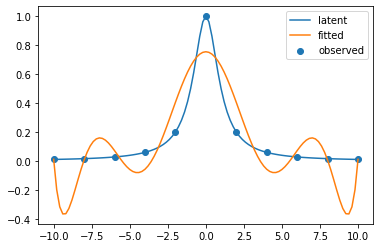

[ 7.54523683e-01  0.00000000e+00 -1.03360739e-01 -0.00000000e+00
  4.21436935e-03  0.00000000e+00 -6.28858477e-05 -0.00000000e+00
  3.03345796e-07]


In [20]:
coeff = get_coeff(x_observed, gx_observed, d=8)
y_pred = fit_polynomial(coeff, x_latent)

plt.scatter(x_observed, gx_observed, label='observed')
plt.plot(x_latent, g(x_latent), label='latent')
plt.plot(x_latent, y_pred, label='fitted')
plt.legend()
plt.show()
print(coeff)

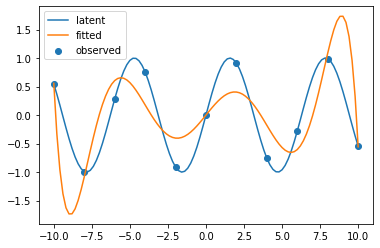

[ 4.00104507e-16  3.31988306e-01 -7.30093973e-17 -3.58506710e-02
  1.93665727e-18  8.54465709e-04 -1.25474552e-20 -5.34718389e-06]


In [21]:
coeff = get_coeff(x_observed, hx_observed, d=7)
y_pred = fit_polynomial(coeff, x_latent)

plt.scatter(x_observed, hx_observed, label='observed')
plt.plot(x_latent, h(x_latent), label='latent')
plt.plot(x_latent, y_pred, label='fitted')
plt.legend()
plt.show()
print(coeff)

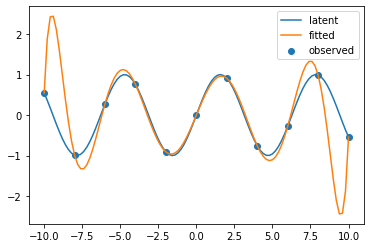

[-4.87474602e-16  9.11060226e-01  2.64725397e-16 -1.33280236e-01
 -1.72383645e-17  5.06856847e-03  3.21918197e-19 -6.98169983e-05
 -1.75664733e-21  3.14938748e-07]


In [22]:
coeff = get_coeff(x_observed, hx_observed, d=9)
y_pred = fit_polynomial(coeff, x_latent)

plt.scatter(x_observed, hx_observed, label='observed')
plt.plot(x_latent, h(x_latent), label='latent')
plt.plot(x_latent, y_pred, label='fitted')
plt.legend()
plt.show()
print(coeff)

In [23]:
!date

Thu Dec  3 06:36:24 UTC 2020
